<h1>Extracting Stock Data Using a Python Library</h1>


In [1]:

!pip install yfinance
#!pip install pandas

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=e0955e90302530d1cf1bfe53a5dbb9084465c997290282b8729791d8e020490d
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/26/af/8b/fac1b47dffef567f945641cdc9b67bb25fae5725d462a8cf81
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=638efb2e35845938f81d03d60dbc3e1e023579f26db32862bc17485e168d70b3
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Succ

In [2]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [5]:
apple = yf.Ticker("AAPL")


Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here [https://aroussi.com/post/python-yahoo-finance](https://aroussi.com/post/python-yahoo-finance?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [6]:

apple_info=apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 147000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r

We can get the <code>'country'</code> using the key country


In [7]:
apple_info['country']

'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [10]:

apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [11]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100922,0.101361,0.100922,0.100922,469033600,0.0,0.0
1980-12-15,0.096096,0.096096,0.095657,0.095657,175884800,0.0,0.0
1980-12-16,0.089075,0.089075,0.088636,0.088636,105728000,0.0,0.0
1980-12-17,0.090830,0.091268,0.090830,0.090830,86441600,0.0,0.0
1980-12-18,0.093463,0.093902,0.093463,0.093463,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [14]:
apple_share_price_data.reset_index(inplace=True)
apple_share_price_data.head()

,level_0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,0,1980-12-12,0.100922,0.101361,0.100922,0.100922,469033600,0.0,0.0
1,1,1,1980-12-15,0.096096,0.096096,0.095657,0.095657,175884800,0.0,0.0
2,2,2,1980-12-16,0.089075,0.089075,0.088636,0.088636,105728000,0.0,0.0
3,3,3,1980-12-17,0.090830,0.091268,0.090830,0.090830,86441600,0.0,0.0
4,4,4,1980-12-18,0.093463,0.093902,0.093463,0.093463,73449600,0.0,0.0


We can plot the `Open` price against the `Date`:


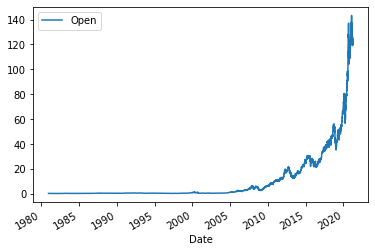

In [15]:

apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [16]:
 
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-02-07    0.192500
2020-05-08    0.205000
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
Name: Dividends, Length: 70, dtype: float64

We can plot the dividends overtime:


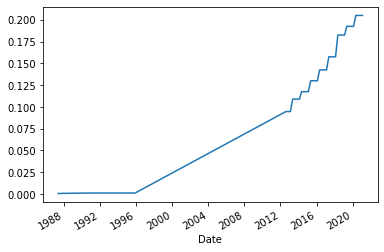

In [18]:

apple.dividends.plot()

## Exercise


Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [21]:
amd = yf.Ticker('AMD')
amd


yfinance.Ticker object <AMD>

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


In [35]:
amd_country = amd.info
amd_country['country']

'United States'

<b>Question 2</b> Use the key  <code>'sector'</code> to find the sector the stock belongs to, remember it as it will be a quiz question.


In [38]:
amd_sector = amd.info['sector']
amd_sector


'Technology'

<b>Question 3</b> Find the max of the <code>Volume</code> column of AMD using the `history` function, set the <code>period</code> to max.


In [138]:
amd_history = amd.history(period='max')
#amd_history[['Volume']].max()
amd_history.reset_index (inplace=True)
new_amd_history= amd_history[['Date','Volume']]
maxvol = new_amd_history[['Volume']].max()
idxmax = new_amd_history[['Volume']].idxmax()
print(maxvol, ' ', idxmax)

new_amd_history.iloc[9695:9700]


Volume    325058400
dtype: int64   Volume    9696
dtype: int64


,Date,Volume
9695,2018-08-24,164328200
9696,2018-08-27,325058400
9697,2018-08-28,215771200
9698,2018-08-29,143223200
9699,2018-08-30,103607300
